# Homework 2
Pedro Augusto Januzzi Guerra

# Questions

1. Use the function of HW 1 to compute the input matrices for applying Vaughan (1970) and direct iteration on the Riccati equation for the following problem:

\begin{align*}
\max_{c_t,k_{t+1}} &\mathbb{E} \sum_{t=0} \beta^t \frac{c_t^{1-\sigma}-1}{1-\sigma}\\
\text{s.t.}\hspace{3mm}& c_t + k_{t+1} - (1-\delta)k_t = z_tk_t^\alpha\\
&\log z_t = \rho \log z_{t-1} + \epsilon_t, \hspace{3mm}\epsilon_t \sim N(0,\sigma_\epsilon^2)
\end{align*}

- a. Let $\sigma \approx 1$, $\beta=0.95$, $\delta=0.05$, $\alpha=0.33$, $\rho = 0.95$, $\sigma_\epsilon=0.01$. Compute approximations for the policy and value functions. Check the residuals of the first order conditions to see how they look.

- b. Repeat a) with $\delta=1$ and compare the answer to the true solution.
- c. Repeat a) with $\delta=0$ and compare the answer to that derived in McGrattan (1990).
- d. Vary $\beta$. How does the solution change?
- e. Vary $\sigma$. How does the solution change?
- f. Vary $\alpha$. How does the solution change?
- g. Vary $\rho$. How does the solution change?
- h. Vary $\sigma_varepsilon$. How does the solution change?

2. Use BeaData.jl (or a comparable code in your favorite language) to download NIPA Table 1.1.5 and NIPA 1.10 using the BEA API. Then, create a table with rows corresponding to shares of GDP and GDI for years 1970,1980,1990,2000,2010,2020. What shares have changes, if any, over time?

3. How different are the model and data shares?

4. (Optional) Simulate data for the model in HW1, Q3 and match shares up to the BEA shares.

---
For future reference, I've decided to use this homework to take some notes. To that goal, I used two main sources: Computational Methods for the Study of Dynamic Economies (Edited by Robert Marimon and Andrew Scott) and Lecture Notes of Dave Backus (NYU). Below I paste some passages of those sources that I think might be useful in the future in case I need to remember this topic.

<div style="text-align: justify;">
From the book: 
<br>

To capture the main features of the economic decision problems solved by people in the real world, the decision problems solved by the households that live in the model economies must be dynamic and stochastic. Unfortunately, there are no closed-form solutions for the dynamic decision problems that arise once the functional forms for preferences and for the aggregate technology of
the model economies are calibrated to mimic key features of the aggregate behaviour of real economies. One way to get around this difficulty is to use numerical methods to compute approximated solutions to those calibrated decision problems. The linear quadratic (LQ) approximation is one of these methods. It is an approximation because it computes the solution to a quadratic expansion of the utility function about the steady state or the stable growth path of the model economies.

(...)

As Exercise 2.1 illustrates, a problem with using Bellman's operator recursively to compute
the limit in the sequence of value functions is that this method is algebraically very
demanding. An important exception to this rule is the case of quadratic return functions.
In the following pages we show that if the return function is quadratic in the state and control
variables, and if the constraints are linear in the states, forwarded states and control
variables, then the optimal value function is quadratic in the state variables. Moreover, in
this case Bellman's operator maps quadratic functions into quadratic functions. Therefore,
in the case of linear quadratic problems, if our initial guess is a quadratic function,
then Bellman's operator returns another quadratic function, and therefore every function
in the recursive sequence is quadratic.

Unfortunately quadratic return functions are not very useful in macroeconomics
since they are not supported by the stylized facts that describe the aggregate time series
of most real economies. Instead, evidence from real economies suggests that we should consider CES (constant elasticity of substitution) utility functions. One way to get around
this problem is to use Taylor's expansion to approximate the CES functions that we are
interested in with a quadratic function. This procedure and the proposition described in
the previous paragraph are the gist of the LQ approximation.

The LQ approximation is a reasonable approximation when the following conditions
are met: the deterministic versions of the model economies converge to stable steady
states, or to stable growth paths
and the local dynamics about the steady state of the real
economy in which we are interested is well approximated by a linear law of motion. The
reason for this last condition is that, as we have already mentioned, the optimal decision
rules obtained using the LQ approximation are linear and, therefore, this method should
not be used when there is evidence of nonlinearities in the real economy data. The
real business cycle literature is full of examples where the LQ approximation has been
successfully used.

(...)

In general, operating with expectations is hard, but in the case of LQ problems the
certainty equivalence principle simplifies matters considerably. LQ problems have the
following two features: the covariance matrix of the vector of random variables only
shows up in the independent terms of the optimal value functions and the optimal
decision rules are independent of this matrix.
These two features of linear quadratic
problems are known as the certainty equivalence principle.

Note: The certainty equivalence principle only holds when the objective function is quadratic and
the constraints are linear. It does not characterize stochastic control problems in general.
</div>

<div style="text-align: justify;">
From Dave Backus' notes:
<br>

Linear-quadratic or LQ problems are those with quadratic returns and linear laws of motion. As a result, the value functions are quadratic functions of the state and the first-order
conditions and decision rules are linear. LQ problems have the property that the decision
rules for stochastic problems are the same as those for the associated deterministic problem
(“certainty equivalence”).
</div>

Now, let's move to the model in the homework. 

Let $f(k_t,z_t) = z_tk_t^\alpha + (1-\delta)k_t$. The recursive formulation of the SPP given in HW2 is given by: 

$$
V(k,z) = \max_{k'} \{u(f(k,z)-k') + \beta\mathbb{E}[V(k',z')|z]\} \\[3pt]
\text{s.t.}\hspace{3mm} log(z_t) = \rho log(z_{t-1}) + \varepsilon_t, \hspace{3mm} \varepsilon \sim N(0,\sigma _\varepsilon^2)
$$
<br>

We can generalize the problem abov to the case of multiple state and control variables using the following general notation: 

$$
V(z,s) = \max_{d} \{r(z,s,d) + \beta\mathbb{E}[V(z',s')|z]\}\\[3pt]
\text{s.t.}\hspace{3mm} s' = M(z,s,d)\\
\hspace{6mm} z' = L(z) + \varepsilon'
$$

where $z$ is the vector of $n_z$ exogenous state variables; $s$ is the vector of $n_s$ endogenous state variables; $d$ is the vector of the $n_d$ control variables; $\varepsilon$ is the vector of $n_\varepsilon$ random variables with zero mean and finite variance; $r$ is the return function; and $M$ and $L$ are two linear functions.

Note that in our exercise, the only exogenous state variable we have is TFP shocks, $z$, and the only endogenous state variable is current capital holdings, $k$. Furthermore, at each "period", we have two control variables: consumption, $c$, and capital holdings for the next period, $k'$.

This formulation is useful so we can distinguish endogenous and exogenous state variables. However, to use a notation similar to the one used in McGrattan(1990), we can use $X_t$ to denote the vector of state variables (both endogenous and exogenous) at time $t$, and $u_t$ to denote the vector of control variables. 

As discussed before, the Linear Quadratic Approximation consists of approximating the return function, in our case the utility function, by a quadratic function, and the system of constraints, by a linear function. To approximate the return function by a quadratic one, we use a second-order Taylor expansion around the steady-state of the economy we're considering. Letting $i = (X,u)$, this Taylor expansion is given by:

$$
r(i) \approx r(\bar{i}) + r_X(i)(X-\bar{X}) + r_u(\bar{i})(i)(u-\bar{u}) + \frac{1}{2}(X-\bar{X})^Tr_{XX}(X-\bar{X}) + \frac{1}{2}(u-\bar{u})^Tr_{uu}(u-bar{u}) + \frac{1}{2}(u-\bar{u})^Tr_{uX}(X-bar{X})\cdot2
$$

where bar-variables indicate the steady-state values of the corresponding **deterministic** economy and subscripts in the return function indicate the derivative with respective to that variable.

A different way to write the approximation above is as a function of the Jacobian and Hessian matrices:

$$
r(X,u) \approx (\bar{r} - \bar{T}^T\bar{J} + \frac{1}{2}\bar{T}^T\bar{H}\bar{T}) + T^T(\bar{J}-\bar{H}\bar{T}) + \frac{1}{2}T^T\bar{H}T
$$

where the scalar $r$ is the return function evaluated at the steady-state levels; the column vector $T$ is such that $T = [X \hspace{2mm}u]^T$; the column vector $\bar{J}$ is the Jacobian evaluated at the steady-state; and the column vector $\bar{H}$ is the Hessian evaluated at the steady-state.

Due to the quadratic form of the last expression, we can rewrite it as:

$$
r(X,u) \approx 
\begin{bmatrix} 
X^T & u^T 
\end{bmatrix}
\begin{bmatrix}
Q_{11} & Q_{12}^T \\
Q_{12} & Q_{22}
\end{bmatrix}
\begin{bmatrix}
X \\
u
\end{bmatrix}
= X^TQX + u^TRu + 2X^TWu
$$

where $Q_{11} = \bar{r}-\bar{T}^T\bar{J} + \frac{1}{2}\bar{T}^T\bar{H}\bar{T}$, $\hspace{3mm}$ $Q_{12}=\frac{1}{2}(\bar{J}-\bar{H}\bar{T})$, $\hspace{3mm}$ and $Q_{22} = \frac{1}{2}\bar{H}$.

Define:

$$ 
\hat{Q} =
\begin{bmatrix}
Q_{11} & Q_{12}^T \\
Q_{12} & Q_{22}
\end{bmatrix}
$$

This is a block matrix, so in order to compute matrices $Q$, $W$, and $R$ we have to make some transformations in $\hat{Q}$. Element $Q_{11}$ in our example will be a 1x1 matrix, so we cannot simply say that $Q_{11} = Q$. We have to define $Q$ (in Ellen's notation) as the matrix composed by the first 3 rows and 3 columns of $\hat{Q}$. Similarly, $W$ as the elements corresponding to the 4-th row and columns 1, 2, and 3. $R$ will be the last element in our matrix; that is, in our example, it will be the element in the 4-th row and 4-th column. 
 
Lastly, for the constraints we use a linear approximation as follow: 

$$
X_{t+1} = AX_t + Bu_t + C\varepsilon_{t+1}
$$

where $A$, $B$, and $C$ are matrices we will find for each problem analyzed.

Now, let's move to the problem itself. First, we need to compute the steady-state of the deterministic economy. In the deterministic environment, $\varepsilon_t = 0 \hspace{2mm}\forall t$. Then, from the shock's process we have: 

$$
\begin{align*}
\log(z_1) &= \rho \log(z_0) \\
\log(z_2) &= \rho \log(z_1) \\
        &= \rho^2 \log(z_0) \\
        &\vdots \\
\log(z_t) &= \rho^t\log(z_0)
\end{align*}
$$

Since $\rho \in(0,1)$, it follows that $$\lim_{t\rightarrow \infty} \log(z_t) = 0$$ which in turn implies $z_t = 1$.

The Bellman equation corresponding to the deterministic economy is given by:

$$
\begin{align*}
    V(k) &= \max_{c,k'\geq 0} \Big\{u(c) + \beta V(k')\Big\}\\[3pt]
    &\text{s.a.} \hspace{4mm} k' = k^\alpha - c + (1-\delta)k\\[3pt]
\end{align*}
$$

The FOC with respect to $k'$ is given by:

$$
\begin{align*}
    \frac{\partial V(k)}{\partial k'} = 0 \hspace{3mm}\forall k\hspace{3mm} \Longrightarrow \hspace{3mm}& u'(k^\alpha + (1-\delta)k - k')(-1)+\beta V'(k')\\[3pt]
    & u'(k^\alpha + (1-\delta)k - k') = \beta V'(k') \hspace{3mm}\forall k
\end{align*}
$$

But we don't have $V(k')$. Differentiating $V(k)$ wrt $k$ yields:

$$
\begin{align*}
    V'(k) &= u'(k^\alpha + (1-\delta)k - k')(\alpha k^{\alpha-1}+1-\delta) + u'(k^\alpha + (1-\delta)k - k')(-1)\frac{\partial k'}{\partial k} + \beta V'(k')\frac{\partial k'}{\partial k}\\[3pt]
    &= u'(k^\alpha + (1-\delta)k - k')(\alpha k^{\alpha-1}+1-\delta) - [u'(k^\alpha + (1-\delta)k - k') - \beta V'(k')]\frac{\partial k'}{\partial k}
\end{align*}
$$

By the Envelope Theorem, it follows that: 

$$
\begin{align*}
    V'(k) &= u'(k^\alpha + (1-\delta)k - k')(\alpha k^{\alpha-1}+1-\delta)
\end{align*}
$$

Hence,

$$
\begin{align*}
    V'(k') &= u'({k'}^\alpha + (1-\delta)k' - k")(\alpha {k'}^{\alpha-1}+1-\delta)
\end{align*}
$$

Substituting this in the FOC, we have: 

$$
\begin{align*}
    u'(k^\alpha + (1-\delta)k - k') &= \beta[u'({k'}^\alpha + (1-\delta)k' - k")(\alpha {k'}^{\alpha-1}+1-\delta)]\\[3pt]
    u'(c) &= \beta u'(c')(\alpha {k'}^{\alpha-1}+1-\delta)\\[3pt]
    \alpha {k'}^{\alpha-1}+1-\delta &= \frac{1}{\beta}\frac{u'(c)}{u'(c')}
\end{align*}
$$

which is the Euler Equation. 

In S.S., $m_t = m_{t+1} \hspace{2mm}\forall t,\hspace{2mm}\forall m\in\{c,k\}$, which implies that $u(c) = u(c')$. Hence,

$$
\begin{align*}
    \alpha k^{*\alpha-1}+1-\delta &= \frac{1}{\beta}\\[3pt]
    \alpha k^{*\alpha-1} &= \frac{1}{\beta}+\delta-1\\[3pt]
    \therefore k^* &= \Big[\frac{1}{\alpha}\Big(\frac{1}{\beta}+\delta-1\Big)\Big]^{\frac{1}{\alpha-1}}
\end{align*}
$$

Using the budget constraint, we can recover the expression of consumption in S.S.:

$$
c = k^{*^{\alpha}} - \delta k^*
$$

---
# Get functions created in HW 1

In [200]:
# Packages used
using ForwardDiff, LinearAlgebra, PrettyTables, Plots, DataFrames, Chain, DataFramesMeta, Dates

In [201]:
function derivatives(f,x) 
    # Function take x and f as inputs; the output is the Jacobian (actually, the gradient, since it's a scalar real function) and Hessian matrices.
   
    # Since f is a scalar real value function, using ForwardDiff.jacobian is not appropriate, since it expects a vector of functions.
    J = ForwardDiff.gradient(f, x) 
    H = ForwardDiff.hessian(f, x)
    
    return J,H
end

derivatives (generic function with 1 method)

In [202]:
function getPF_di(A,B,C,Q,R,W,β) 

    tA = sqrt(β)*(A-B*inv(R)*W'); #tA stands for ̃A; same holds for the transformations below
    tB = sqrt(β)*B;
    tQ = Q-W*inv(R)*W';

    sizeA = size(A); # get the dimensions of matrix A
    P_old = zeros(sizeA); # initial guess for Ricatti Matrix; note it is symmetric + negative semidefinite
    P_new = P_old; # setting a new matrix that will store the updates for P
    difP = 1; # initial value for the norm of the difference for P's iteration

    difF = difP; # initial value for the norm of the difference for F's iteration
    tF_old = inv(R .+ tB'*P_old*tB)*tB'*P_old*tA; # calculating an initial value for ̃F (tildeF); 
    # apparently, there's a typo in the paper, since the last ̃B should be transposed
    tF_new = tF_old; # setting a new matrix that will store the updates for ̃F

    # PS: Note that P_new stands for P_{n+1} while ̃F_new for ̃F_n.
    
    γ = 1e-8; # tolerance parameter γ. I'm setting γ ≡ γ_i ∀ i∈{1,2}
    tolP = γ; # initial tolerance for P
    tolF = tolP; # initial tolerance for ̃F

    while difP > tolP || difF > tolF # that is, loop will stop only when both difP < tolP AND difF < tolF
        tF_old = tF_new; # update F_old
        P_old = P_new; # update P_old
        P_new = tQ .+ tA'*P_old*tA .- tA'*P_old*tB*inv(R .+ tB'*P_old*tB)*tB'*P_old*tA; # calculate P_new using step 1 from the paper
        tF_new = inv(R .+ tB'*P_old*tB)*tB'*P_old*tA; # calculate tF_new using step 1 from the paper

        difP = norm(P_new-P_old,Inf); # taking the supnorm
        difF = norm(tF_new-tF_old,Inf); 

        tolP = γ*norm(P_old,Inf); # update tolerance for P
        tolF = γ*norm(tF_old,Inf); # update tolerance for tF
    end

    P = P_new; # solution for P
    F = tF_new + inv(R)*W'; # solution for F

    return F,P
end

getPF_di (generic function with 1 method)

In [203]:
function getPF_va(A,B,C,Q,R,W,β)
    
    tA = sqrt(β)*(A-B*inv(R)*W'); #tA stands for ̃A; same holds for the transformations below
    tB = sqrt(β)*B;
    tQ = Q-W*inv(R)*W';

    # Construct elements that will be in the Hamiltonian matrix:
    a11 = inv(tA);
    a12 = inv(tA)*tB*inv(R)*tB';
    a21 = tQ*inv(tA);
    a22 = tQ*inv(tA)*tB*inv(R)*tB' + tA';

    # Building the Hamiltonian matrix:
    ha = [a11 a12;a21 a22];

    # Get the eigenvalues and eigenvectors of the Hamiltonian matrix:
    eg = eigen(ha); 

    # Sort eigenvalues in descending order (in case they are not automatically ordered in that way)
    sort_idx = sortperm(eg.values, rev=true);

    # Get the eigenvalues in descending order
    sort_egval = eg.values[sort_idx];

    # Get the eigenvectors corresponding to the eigenvalues that lie outside the unit circle
    sort_egvec = eg.vectors[:, sort_idx];

    rows = size(a11, 1);  # number of rows in a11
    cols = size(a11, 2); # number of columns in a11

    V11 = sort_egvec[1:rows, 1:cols]; # compute V_11        
    V21 = sort_egvec[rows+1:end, 1:cols]; # compute V_21
    
    # Compute P and F
    P = V21*inv(V11); # solution for P
    F = inv(R .+ tB'*P*tB)*tB'*P*tA .+ inv(R)*W'; # solution for F

    return F,P

end

getPF_va (generic function with 1 method)

Recall that we will use a linear approximation for the constraints: 

$$
X_{t+1} = AX_t + Bu_t + C\varepsilon_{t+1}
$$

where $X_t = \begin{bmatrix} 1 & \log z_t & k_t \end{bmatrix}^T$.

Hence, we need to find matrices A, B, and C such that the system is satisfied.

**Claim:** $A = \begin{bmatrix} 1 & 0 & 0 \\ 0 & \rho & 0 \\ 0 & 0 & 1-\delta\end{bmatrix}$, $B = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix}^T$, and $C = \begin{bmatrix} 0 & 1 & 0 \end{bmatrix}^T$.

**Proof:** We use a guess and verify approach. Guess that the matrices have the format above. Let's verify the guess:

$$
\begin{align*}
X_{t+1} &= AX_t + Bu_t + C\varepsilon_{t+1}\\
\begin{bmatrix} 1 & \log z_{t+1} & k_{t+1}\end{bmatrix}^T &= \begin{bmatrix} 1 & 0 & 0 \\ 0 & \rho & 0 \\ 0 & 0 & 1-\delta \end{bmatrix} \cdot \begin{bmatrix} 1 & \log z_{t} & k_t\end{bmatrix}^T + \begin{bmatrix} 0 & 0 & 1 \end{bmatrix}^T \cdot [x_t] + \begin{bmatrix} 0 & 1 & 0 \end{bmatrix}^T \cdot [\varepsilon_{t+1}]\\
&= \begin{bmatrix} 1 & \rho \log z_t & (1-\delta)k_t\end{bmatrix}^T + \begin{bmatrix} 0 & 0 & x_t \end{bmatrix}^T + \begin{bmatrix} 0 & \varepsilon_{t+1} & 0 \end{bmatrix}^T\\ 
&= \begin{bmatrix} 1 & \rho \log z_t + \varepsilon_{t+1} & (1-\delta)k_t+x_t \end{bmatrix}^T
\end{align*}
$$

where $x_t$ denotes investment. 

Since this is exactly the system of constraints we have, the proof is finished.

<div style="text-align: right;">
QED
</div>

---
# Question 1

In [204]:
function util(σ,α)

    c = n -> exp(n[1])*n[2]^α - n[3]; # since my shocks are log(z), I have to take the exponential here

    if σ == 1
        u = n -> log(c(n)); # this is ln
    else
        u = n -> (c(n)^(1-σ)-1)/(1-σ);
    end

    return u

    #= I could  have constructed this function so that, when I call it, it receives just one scalar (c) and give my directly the utility of c. (e.g., r=util(σ,α)); utility = r(number).
        However, in order to help me calculate the Jacobian and Hessian, I've decided to define c as a function of z (shock), k (capital), x (investment), which I'm representing here by
        a vector n of three entries. Then, in order to compute the utility associated to a level of consumption, I'll have to type an vector of three entries, instead of just one scalar 
        representing consumption (e.g., r=util(σ,α); utility = r([number1,number2,number3]) ). =#
end

util (generic function with 1 method)

## Item (a)

As in Ellen's paper, I'll use investment as my control variable. This is a good way to not carry one extra control variable, consumption. If I don't do this, my vector of control variables would be $u_t = \begin{bmatrix} c_t & k_{t+1}\end{bmatrix}$.

In [205]:
# Parameters

σ = 1; # coefficient of relative risk aversion
β = 0.95; # discount factor
δ = 0.05; # depreciation rate
α = 0.33; # output elasticity of capital
ρ = 0.95; # persistence of shocks
σ_ε = 0.01; # variance of shocks
r = util(σ,α); # return function

Create function to compute the steady-state variables for the deterministic economy:

In [206]:
function ss(σ,β,δ,α,ρ,σ_ε)

    z = 0;
    k = ( (1/α) *( (1/β) - 1 + δ) )^(1/(α-1)); # ss level for capital
    c = k^α - δ*k; # ss level of consumption 
    x = δ*k; # ss level of investment

    return z,k,c,x
end

ss (generic function with 1 method)

Compute the steady-state variables given the parameters:

In [207]:
z,k,c,x = ss(σ,β,δ,α,ρ,σ_ε);

Create a function to get the Jacobian and Hessian matrices:

In [208]:
function getJacobHess(σ,α,z,k,x,r)

    pt = [z,k,x]; # I believe this order matter, considering I defined X_t = [1  z  k], so I gotta respect this order and add the control variable as the last entry in the vector.
    J,H = derivatives(r,pt);

    # Round the values in the Jacobian and Hessian to 5 decimal places
    J = round.(J, digits=5);
    H = round.(H, digits=5);    

    return J,H
end

getJacobHess (generic function with 1 method)

Compute the Jacobian and Hessian:

In [209]:
J,H = getJacobHess(σ,α,z,k,x,r);

Create function to build matrices A,B,C,Q,R,W:

In [210]:
function matrices(ρ,δ,J,H,z,k,x,r)

    A = [1 0 0; 0 ρ 0; 0 0 1-δ]; 
    B = [0 0 1]'; 
    C = [0 1 0]'; 

    T = [z k x]'; # in the previous explanation about theory, this is actually Tbar
    rbar = r([z,k,x]); # utility in the ss
    Q11 = rbar .- T'*J .+ 0.5*T'*H*T; # this is Q in my notation above

    Q22 = 0.5*H; # this is R in my notation above

    Q12 = 0.5*(J-H*T);

    # Create a block matrix
    Qaux = [Q11 Q12'; Q12 Q22];

    # Partition Q
    Q = Qaux[1:3,1:3];
    W = Qaux[4,1:3];
    R = Qaux[end,end];

    return A,B,C,Q,R,W
end

matrices (generic function with 1 method)

Compute Matrices:

In [211]:
A,B,C,Q,R,W = matrices(ρ,δ,J,H,z,k,x,r);

Calculate F and P via Direct Iteration:

In [212]:
time_di = @elapsed begin
    F_di,P_di = getPF_di(A,B,C,Q,R,W,β)
    end 
    
    # Print the solution:
    pretty_table(round.(F_di;digits=4); header = ["1","2","3"],
                title = "Vector F",row_labels = ["1"],
                border_crayon = crayon"bold yellow",
                tf = tf_simple)
    
    pretty_table(round.(P_di;digits=4); header = ["1","2","3"],
                title = "\n \nMatrix P",
                row_labels = ["1","2","3"],
                border_crayon = crayon"bold yellow",
                tf = tf_simple)

Vector F
==== ========= ========= =========
            1         2        3  
==== ========= ========= =========
  1   -0.5734   -1.0321   0.0503  
==== ========= ========= =========

 
Matrix P
==== ======== ========= ==========
           1         2         3  
==== ======== ========= ==========
  1   2.6531    6.9218    0.5826  
  2   6.9218    1.1629   -0.1419  
  3   0.5826   -0.1419   -0.0402  
==== ======== ========= ==========


Calculate F and P via Vaughan's Algorithm:

In [213]:
time_va = @elapsed begin
    F_va,P_va = getPF_va(A,B,C,Q,R,W,β)
    end

# Print the solution:
pretty_table(round.(F_va;digits=4); header = ["1","2","3"],
title = "Vector F",
border_crayon = crayon"bold yellow",
tf = tf_simple)

pretty_table(round.(P_va;digits=4); header = ["1","2","3"],
title = "\n \n Matrix P",
row_labels = ["1","2","3"],
border_crayon = crayon"bold yellow",
tf = tf_simple)

Vector F
========== ========= =========
        1         2        3  
========== ========= =========
  -0.5734   -1.0321   0.0503  
========== ========= =========

 
 Matrix P
==== ======== ========= ==========
           1         2         3  
==== ======== ========= ==========
  1   2.6531    6.9218    0.5826  
  2   6.9218    1.1629   -0.1419  
  3   0.5826   -0.1419   -0.0402  
==== ======== ========= ==========


Comparing how much time it took for each algorithm to reach a solution:

In [214]:
println("Simulation via Direct Iteration: $(round(time_di, digits=4)) seconds.")
println("Simulation via Vaughan's Algorithm: $(round(time_va, digits=4)) seconds.")
println("Direct Iteration was approximately $(round(time_va/time_di, digits=2)) times faster than Vaughan's Algorithm.")

Simulation via Direct Iteration: 0.1094 seconds.
Simulation via Vaughan's Algorithm: 0.1329 seconds.
Direct Iteration was approximately 1.21 times faster than Vaughan's Algorithm.


Note that $F$ and $P$ are directly related to the policy and value functions, respectively. More precisely, from McGrattan(1990), we know that:

$$u_t = -FX_t$$

So for any value of initial capital holdings, $k_0$, we can use the rule above to compute investment in period $t=0$, $x_0$. With $x_0$, we can use the law of motion of capital to find $k_1$. Lastly, we can recover consumption in period $t=0$, $c_0$, using feasibility. Iteratively, we can create a sequence by computing the transition dynamics. 

Regarding the solution for the value function, $V(X)$, it is given by the following expression:

$$V(X) = X'PX + m$$ 

where $m = \frac{\beta}{1-\beta}\sigma_\varepsilon^2C'PC$.

Now let's compute the Value Function. The first thing we need to do it to set up a grid for capital. I'll create a function that creates a capital grid around the level of steady-state. 

In [215]:
function grid_capital(k,nk) #nk number of points in the grid

    lb = 0.7*k; # lower bound around 30% below the SS level
    ub = 1.3*k; # upper bound around 30% above the SS level
    k_grid = LinRange(lb,ub,nk);

    return k_grid
end

grid_capital (generic function with 1 method)

In [216]:
# Create the grid for capital
nk = 500; # number of grid points
k_grid = grid_capital(k,nk);

Create a grid for shocks:

In [217]:
# Create a linearly spaced grid for z
n = 7; # number of points
z_grid = LinRange(0.93, 1.07, n)
z_grid = log.(z_grid); # getting the log of shocks

t = 100; # number of periods

Create function to compute the value function:

In [218]:
function vf(β,σ_ε,C,P,nk,n,z_grid,k_grid) #n number of shocks

    m = (β/(1-β))*(σ_ε^2)*C'*P*C; # constant m
    value_function = zeros(nk,n);
    
    for j = 1:n
        for i = 1:nk
            value_function[i,j] = [1 , z_grid[j] , k_grid[i]]' * P * [1 , z_grid[j] , k_grid[i]];
        end
    end
    
    vf = value_function .+ m;
    
    return vf
end

vf (generic function with 1 method)

Compute the value function:

In [219]:
v_function = vf(β,σ_ε,C,P_va,nk,n,z_grid,k_grid);

Let's plot the Value Function:

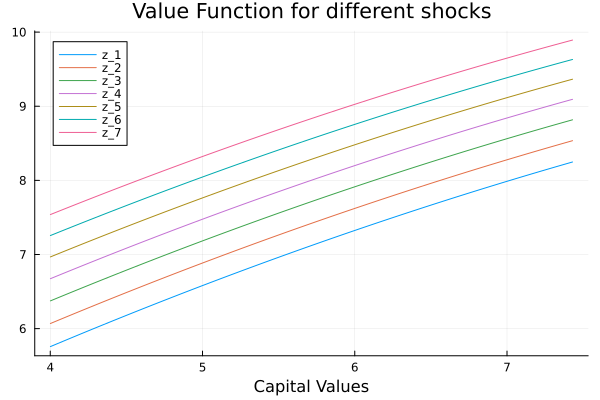

In [220]:
# Plot
plot(k_grid, v_function, label=["z_1" "z_2" "z_3" "z_4" "z_5" "z_6" "z_7"],
     title="Value Function for different shocks", xlabel="Capital Values")

Create function to compute the policy function for Investment:

In [221]:
function investment(F,k,x,k_grid,z_grid,nk,n)

    inv_function = zeros(nk,n);

    for j = 1:n
        for i = 1:nk
            inv_function[i,j] = -F_va[2]*(k_grid[i] - k) - F_va[1]*(z_grid[j]-z) + x # this  comes from the fact that the policy rule is x_t - xbar = -F[3]*(k_t - kbar) - F[2](z_t - zbar);
        end
    end

    return inv_function

end

investment (generic function with 1 method)

Calculate Policy Function for Investment:

In [222]:
i_function = investment(F_va,k,x,k_grid,z_grid,nk,n);

Let's plot the Policy Function for Investment:

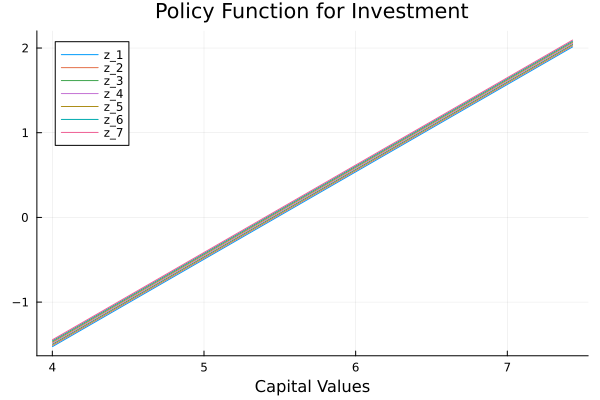

In [223]:
# Plot
plot(k_grid, i_function, label=["z_1" "z_2" "z_3" "z_4" "z_5" "z_6" "z_7"],
     title="Policy Function for Investment", xlabel="Capital Values")

Now let's compute the transition dynamics for capital and consumption in our economy.

The function below computes the transition dynamics given a initial value for capital holdings. This function was created by Rafael Fonseca, who allowed me to use it. I had computed a different function before, but his function is more efficient and concise, which is why I decided to use it here.

In [224]:
function dynamics(F,A,B,C,t,X0,shocks)
    u = zeros(t);
    X = zeros(size(A,1),t+1)
    X[:,1] = X0;

    for i in 1:t
        u[i] = dot(-F,X[:,i]);
        X[:,i+1] = A*X[:,i] + B*u[i] + C*shocks[i]
    end

    return u, X

end

dynamics (generic function with 1 method)

Calculate the transition dynamics for different initial values of capital holdings:

In [225]:
shocks = zeros(t); # zero shocks always
nk0 = 50; # length of grid for k0
k0_grid = LinRange(0.1,100,nk0); # grid for initial capital holdings, k_0
k_pol = zeros(t+1,nk0); # vector that will store the dynamices of capital for each possible k_0

for i = 1:nk0
    X_0 = [1;z;k0_grid[i]];
    u_aux,X_aux = dynamics(F_va,A,B,C,t,X_0,shocks);
    k_pol[:,i] = X_aux[3,:];
end

Let's plot the transition dynamics for capital:

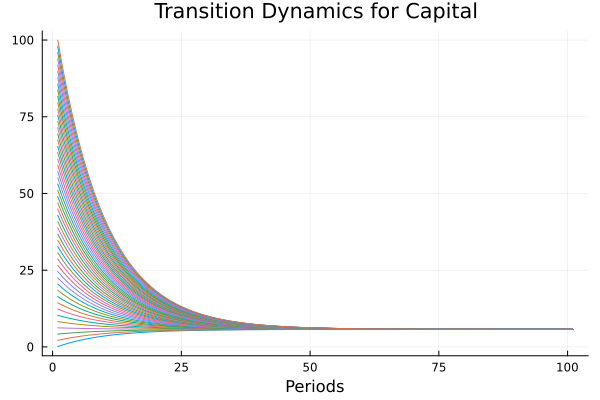

In [226]:
# Plot
plot(k_pol, label=false,
     title="Transition Dynamics for Capital", xlabel="Periods")

Recovering Consumption:

In [227]:
c_pol = zeros(t,nk0);
for ik = 1:nk0
    for it = 1:t 
        c_pol[it,ik] = exp(z)*k_pol[it,ik]^α + (1-δ)*k_pol[it,ik] - k_pol[it+1,ik];
    end
end

Plot the transition dynamics for consumption:

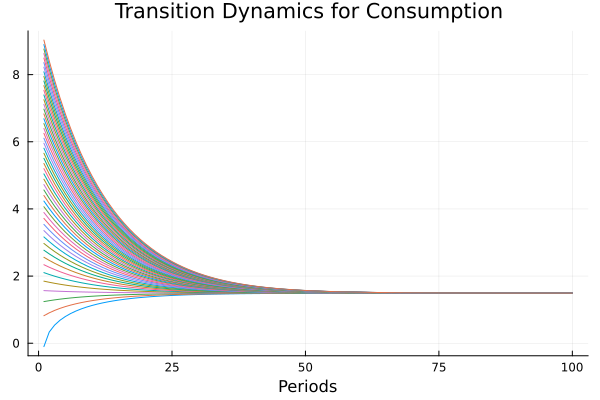

In [228]:
# Plot
plot(c_pol, label=false,
     title="Transition Dynamics for Consumption", xlabel="Periods", legend = false)

As we can see, both capital and consumption always converge to steady-state level, regardless of the initial amount of capital holdings.

Now I check the residuals of the first order conditions. To that goal, I use Euler Equation Errors, due to its easy interpretation. Before calculating the EEE, let me brief describe what they represent.

One the criticisms about compututational economics regards the validity of its results, that is, often it's not clear whether a good solution has been found by our code. Euler Equation Erros help us to understand the accuracy of the approximation made by the code. In our model, the Euler Equation is given by: 

$$
u'(c) = \beta u'(c')(\alpha {k'}^{\alpha-1}+1-\delta)\\[2pt]
\therefore 0=u'(c) - \beta u'(c')(\alpha {k'}^{\alpha-1}+1-\delta)
$$

For the true optimal policy, this has to hold with equality. However, the solution provided by the computer is an approximation, so it is expected that the inequality above will not hold exactly. Consequently, we can use the Euler Equation to estimate the error caused by the approximation. Let the $EEE$ be given by: 

$$
EEE = \log_{10}\Bigg|1-\frac{u'^{-1}(\beta u'(c')(\alpha {k'}^{\alpha-1}+1-\delta))}{c}\Bigg|
$$

It may seem a weird definition, but it has a meaningful interpretation. Suppose $EEE = y$. Then, our approximation makes a \$1 mistake for every \$ $10^{-y}$ spent.

Create a function that computes the derivative of the utility function:

In [229]:
function d_util(σ,c) # Function with the derivative of utility

    if σ == 1
        du = 1/c; 
    else
        du = c^(-σ); 

    end

    return du

end

d_util (generic function with 1 method)

Create a function that computes the inverse of the utility function's derivative:

In [230]:
function inverse_dutil(σ,y)

    if σ == 1
        inv_du = 1/y; 
    else
        inv_du = y^(-1/σ); 

    end

    return inv_du
end

inverse_dutil (generic function with 1 method)

Create function to compute EEE:

In [231]:
function euler_errors(t,nk0,c_pol,k_pol)
    
    eee = zeros(t-2, nk0);
    for ik = 1:nk0
        for i = 1:(t-2) 
            c_today = c_pol[i,ik];
            c_tomorrow = c_pol[i+1,ik];
            aux = α*exp(z)*k_pol[i+1,ik]^(α-1)+1-δ;
            aux = aux*β*d_util(σ,c_tomorrow);
            aux = inverse_dutil(σ,aux);
            aux = aux/c_today;
            eee[i,ik] = log(abs(1-aux));
        end
    end

    return eee
end

euler_errors (generic function with 1 method)

Compute the EEE for different possible initial capital holdings:

In [232]:
eee = euler_errors(t,nk0,c_pol,k_pol);

Plot the EEE:

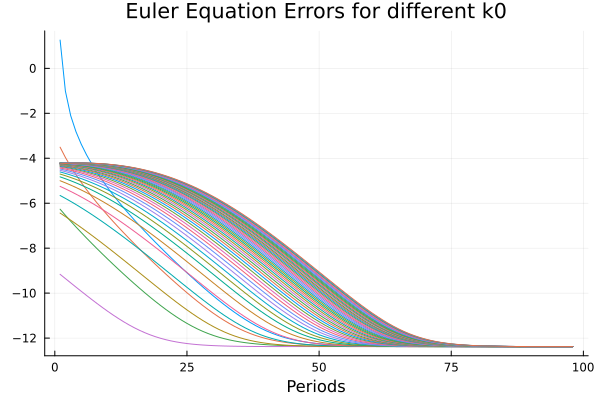

In [233]:
# Plot
plot(eee, label=false,
     title="Euler Equation Errors for different k0", xlabel="Periods", legend = false)

As expected, the Euler Equation Errors (EEE) decrease as the economy converges to the steady state, regardless of the initial capital holdings. At period 0, the EEE are larger compared to those observed once the steady state is reached. Moreover, for any two initial capital holdings, $k_{0_1}$ and $k_{0_2}$, the EEE will be larger for the capital holding that is farther from the steady-state level. This outcome is to be expected since our Taylor expansion was made around the steady-state, meaning it works best when capital holdings are near the steady-state values.

## Item (b)

First, let's compute the new variables:

In [234]:
# New depreciation rate
δb = 1;

# Get new SS values
zb,kb,cb,xb = ss(σ,β,δb,α,ρ,σ_ε);

# Get Jacobian and Hessian
Jb,Hb = getJacobHess(σ,α,zb,kb,xb,r);

# Get Matrices
Ab,Bb,Cb,Qb,Rb,Wb = matrices(ρ,δb,Jb,Hb,zb,kb,xb,r);

# Get F and P
Fb,Pb = getPF_va(Ab,Bb,Cb,Qb,Rb,Wb,β);

# Create capital grid
nkb = nk;
k_gridb = grid_capital(kb,nkb);

Let's compute the (approximated) value function and policy function for capital.

Compute the approximated value function:

In [235]:
zgridnew = zeros(n);
vfb = vf(β,σ_ε,Cb,Pb,nkb,n,zgridnew,k_gridb);
vfb = vfb[:,1];

Create a function to compute the policy function for capital:

In [236]:
function capital_policy(F,k,x,k_grid,nk,dep)

    k_function = zeros(nk);

    for i = 1:nk 
        k_function[i] = (-F*[1 0 k_grid[i]]')[1] + (1-dep)*k_grid[i];
    end

    return k_function
end

capital_policy (generic function with 2 methods)

Compute the approximated policy function for capital:

In [279]:
k_functionb = capital_policy(Fb,kb,xb,k_gridb,nkb,δb);

In the first mini of Macro first year, we solved this problem by guess and verify. Our guess was that $V(k) = a_0 + a_1 \log(k)$, where 

$$
a_1 = \frac{\alpha}{1-\alpha\beta}
$$
and
$$
a_0 = \frac{1}{1-\beta}\frac{1}{1-\alpha\beta}\Bigg[\log(z) - \log\Big(\frac{1}{1-\alpha\beta}\Big) + \beta\alpha\log\beta + \beta\alpha\log\Big(\frac{\alpha}{1-\alpha\beta}\Big)\Bigg]
$$

Moreover, recall that the policy function for capital have the following format:

$$
k'= \frac{\beta a_1 zk^\alpha}{1+\beta a_1}
$$

Let's compute the true solution:

In [280]:
# Get a0 and a1

a1 = α/(1-α*β);
a0 = (1/(1-β))*(1/(1-α*β))*(zb - log(1/(1-α*β)) + β*α*log(β) + β*α*log(α/(1-α*β))); # note that I didn't include log(z) because our z is already the equivalent to the log(z) in the formula.

# Get true value function
V_true = zeros(nkb);

for i = 1:nkb
    V_true[i] = a0 + a1*log(k_gridb[i]);
end

# Get true policy function
kpol_true = zeros(nkb);
for i = 1:nkb
    kpol_true[i] = β*a1*exp(zb)*k_gridb[i]^α/(1+β*a1);
end

Plot Value Function (plot specifications are from Ethan Cohen):

In [281]:
# Plot
plot(k_gridb, V_true, label="True Value Function", xlabel="Capital Values", title = "Value Function")
plot!(k_gridb, vfb, label="Approximated Value Function", lw=2)
vline!([kb], label="Steady State", color=:gray, linestyle=:dash)

Plot Policy Function (plot specifications are from Ethan Cohen):

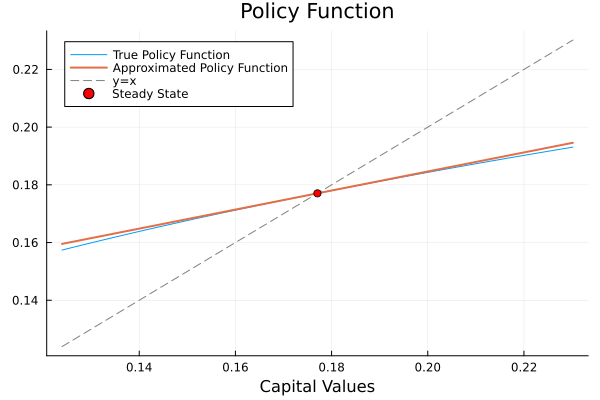

In [240]:
# Plot
plot(k_gridb, kpol_true, label="True Policy Function", xlabel="Capital Values", title = "Policy Function")
plot!(k_gridb, k_functionb, label="Approximated Policy Function", lw=2)
plot!(k_gridb, k_gridb, label="y=x", color=:gray, linestyle=:dash)
scatter!([kb], [kb], color=:red, marker=:circle, label="Steady State")

Note that the approximation is better around the steady-state, as expected. If we allow the capital grid to be finer and with more points, this pattern becomes more noticeable. I do this exercise now.

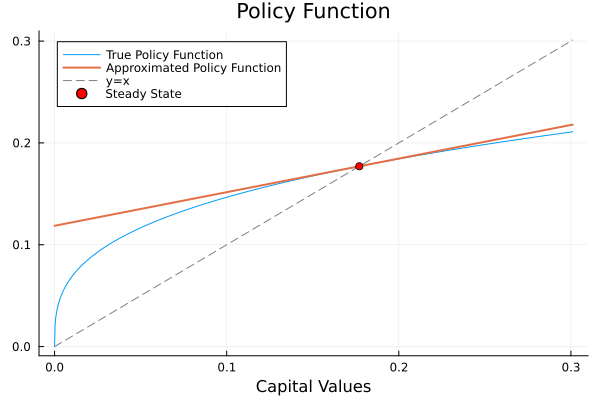

In [241]:
nkb = 1000;
k_gridb = LinRange(0,kb*1.7,nkb);
k_functionb = capital_policy(Fb,kb,xb,k_gridb,nkb);

# Get true value function
V_true = zeros(nkb);

for i = 1:nkb
    V_true[i] = a0 + a1*log(k_gridb[i]);
end

# Get true policy function
kpol_true = zeros(nkb);
for i = 1:nkb
    kpol_true[i] = β*a1*exp(zb)*k_gridb[i]^α/(1+β*a1);
end

# Plot
plot(k_gridb, kpol_true, label="True Policy Function", xlabel="Capital Values", title = "Policy Function")
plot!(k_gridb, k_functionb, label="Approximated Policy Function", lw=2)
plot!(k_gridb, k_gridb, label="y=x", color=:gray, linestyle=:dash)
scatter!([kb], [kb], color=:red, marker=:circle, label="Steady State")

## Item (c)

Compute solution to this exercise:

In [242]:
# New depreciation rate
δc=0; # δ for item c

rc = util(σ,α); # return function

# Get new SS values
zc,kc,cc,xc = ss(σ,β,δc,α,ρ,σ_ε);

# Get Jacobian and Hessian
Jc,Hc = getJacobHess(σ,α,zc,kc,xc,r);

# Get Matrices
Ac,Bc,Cc,Qc,Rc,Wc = matrices(ρ,δc,Jc,Hc,zc,kc,xc,r);

# Get F and P
Fc,Pc = getPF_va(Ac,Bc,Cc,Qc,Rc,Wc,β);

Compute solution with the parameters in McGrattan(1990):

In [243]:
# Parameters

σm = 0.5; # coefficient of relative risk aversion
rm = util(σm,α); # return function

# Get new SS values
zm,km,cm,xm = ss(σm,β,δc,α,ρ,σ_ε);

# Get Jacobian and Hessian
Jm,Hm = getJacobHess(σm,α,zc,kc,xc,rm);

# Get Matrices
Am,Bm,Cm,Qm,Rm,Wm = matrices(ρ,δc,Jm,Hm,zm,km,xm,rm);

# Get F and P
Fm,Pm = getPF_va(Am,Bm,Cm,Qm,Rm,Wm,β);

# Create capital grid
nkc = nk;
k_gridc = grid_capital(kc,nkc);

Compare solutions (table's layout is from Ethan Cohen):

In [244]:
df = DataFrame(
    Parameter = ["Steady State Capital", "Steady State Investment", "Steady State Utility Level"],
    Current = [kc, xc, rc([zc,kc,xc])],
    McGrattan1990 = [km, xm, rm([zm,km,xm])]
)

df

Row,Parameter,Current,McGrattan1990
,String,Float64,Float64
1,Steady State Capital,15.4864,15.4864
2,Steady State Investment,0.0,0.0
3,Steady State Utility Level,0.904188,1.1432


We can see that the resuls are pretty similar. The steady state capital level is the same in both models, once it only depends on parameters $\alpha$, $\beta$ and $\delta$. Since these three parameters are the same in both models, the SS level of capital has to be equal in both model as well as consumption and investment. However, note that the coefficient of relative risk aversion is equal to $1$ in our exercise and $0.5$ in McGrattan(1990). Since agents are less risk averse in the latter than in the former, they earn a higher utility in McGrattan(1990).

Let's also plot the policy function for capital in both models:

In [245]:
k_functionc = capital_policy(Fc,kc,xc,k_gridc,nkc,δc);
k_functionm = capital_policy(Fm,km,xm,k_gridc,nkc,δc);

Plot both policy functions:

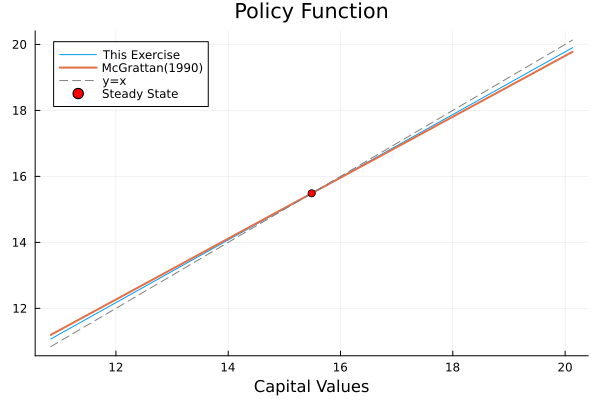

In [246]:
# Plot
plot(k_gridc, k_functionc, label="This Exercise", xlabel="Capital Values", title = "Policy Function")
plot!(k_gridc, k_functionm, label="McGrattan(1990)", lw=2)
plot!(k_gridc, k_gridc, label="y=x", color=:gray, linestyle=:dash)
scatter!([kc], [kc], color=:red, marker=:circle, label="Steady State")

Since the agent is more risk averse in this exercise than in McGrattan (1990), she is more cautious about future uncertainty, which explains the higher savings for lower current capital holdings (x-axis). Note that the blue curve is flatter than the red curve, meaning that in McGrattan(1990)'s environment, the less risk-averse agent accumulates capital more aggressively given an increase in current capital holdings. The reason for this behaviour is that the less risk-averse agent is less concerned with risk, leading her to allocate more resources towards future capital accumulation.

## Item (d)

There are several possible analyses that could be done here in this item. I will compare transition dynamics for different values of $\beta$.

In [247]:
# Grid for β
β_grid = [0.5, 0.75, 0.90, 0.95, 0.99];

# Initialize vectors/matrices
zd = zeros(length(β_grid));
kd = zeros(length(β_grid));
cd = zeros(length(β_grid));
xd = zeros(length(β_grid));
kpol_d = zeros(t+1,length(β_grid))

for i = 1:length(β_grid)
    βd = β_grid[i];
    zd[i],kd[i],cd[i],xd[i] = ss(σ,βd,δ,α,ρ,σ_ε);
    Jd,Hd = getJacobHess(σ,α,zd[i],kd[i],xd[i],r);
    Ad,Bd,Cd,Qd,Rd,Wd = matrices(ρ,δ,Jd,Hd,zd[i],kd[i],xd[i],r);
    Fd,Pd = getPF_va(Ad,Bd,Cd,Qd,Rd,Wd,βd);
    shocks = zeros(t);
    X_0d = [1;zd[i];0.1];
    u_aux,X_aux = dynamics(Fd,Ad,Bd,Cd,t,X_0d,shocks);
    kpol_d[:,i] = X_aux[3,:];
end

Plot all transition dynamics together:

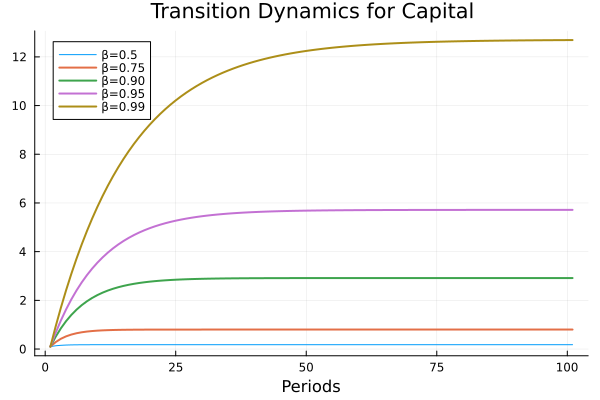

In [248]:
# Plot
plot(kpol_d[:,1], label="β=0.5", xlabel="Periods", title = "Transition Dynamics for Capital")
plot!(kpol_d[:,2], label="β=0.75", lw=2)
plot!(kpol_d[:,3], label="β=0.90", lw=2)
plot!(kpol_d[:,4], label="β=0.95", lw=2)
plot!(kpol_d[:,5], label="β=0.99", lw=2)

We can also compare the steady state values:

In [249]:
dfd = DataFrame(
    Dict(
        "Parameter" => ["Steady State Capital", "Steady State Investment", "Steady State Consumption", "Steady State Utility Level"],
        "β=0.5" => [kd[1], xd[1], cd[1], r([zd[1], kd[1], xd[1]])],
        "β=0.75" => [kd[2], xd[2], cd[2], r([zd[2], kd[2], xd[2]])],
        "β=0.90" => [kd[3], xd[3], cd[3], r([zd[3], kd[3], xd[3]])],
        "β=0.95" => [kd[4], xd[4], cd[4], r([zd[4], kd[4], xd[4]])],
        "β=0.99" => [kd[5], xd[5], cd[5], r([zd[5], kd[5], xd[5]])]
    )
)

dfd


Row,Parameter,β=0.5,β=0.75,β=0.90,β=0.95,β=0.99
,String,Float64,Float64,Float64,Float64,Float64
1,Steady State Capital,0.177721,0.799635,2.91581,5.71563,12.7037
2,Steady State Investment,0.00888604,0.0399817,0.14579,0.285781,0.635183
3,Steady State Consumption,0.556589,0.888887,1.27775,1.49181,1.67846
4,Steady State Utility Level,-0.585928,-0.117785,0.245102,0.399988,0.517877


Recall that the higher $\beta$ is, less impatient the agent it, meaning that she values more the future relative to the present. Intituitively, if $\beta$ is high, then the agent is more willing to sacrifice consumption today for tomorrow, which in turn makes investment higher than in an economy where agents have a lower $\beta$. The table and the graphs above show precisely this: the steady state levels for capital, investment and consumption are monotonically increasing in $\beta$. For all values of $\beta$, I assumed that the agent starts her life with a low amount of capital holdings, $k_0 = 0.1$. 

## Item (e)

I will do an analysis similar to the one done in (d).

In [250]:
# Grid for σ
σ_grid = [0.5, 0.70, 0.80, 0.90, 1];

# Initialize vectors/matrices
ze = zeros(length(σ_grid));
ke = zeros(length(σ_grid));
ce = zeros(length(σ_grid));
xe = zeros(length(σ_grid));
kpol_e = zeros(t+1,length(σ_grid))

for i = 1:length(β_grid)
    σe = σ_grid[i];
    re = util(σe,α); # return function
    ze[i],ke[i],ce[i],xe[i] = ss(σe,β,δ,α,ρ,σ_ε);
    Je,He = getJacobHess(σe,α,ze[i],ke[i],xe[i],re);
    Ae,Be,Ce,Qe,Re,We = matrices(ρ,δ,Je,He,ze[i],ke[i],xe[i],re);
    Fe,Pe = getPF_va(Ae,Be,Ce,Qe,Re,We,β);
    shocks = zeros(t);
    X_0e = [1;ze[i];0.1];
    u_aux,X_aux = dynamics(Fe,Ae,Be,Ce,t,X_0e,shocks);
    k_gridaux = 
    kpol_e[:,i] = X_aux[3,:];
end

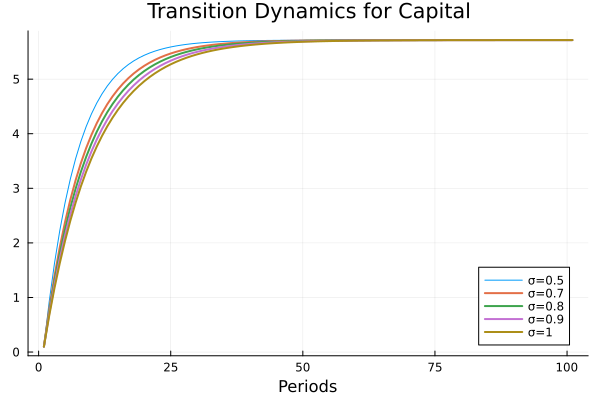

In [251]:
# Plot
plot(kpol_e[:,1], label="σ=0.5", xlabel="Periods", title = "Transition Dynamics for Capital")
plot!(kpol_e[:,2], label="σ=0.7", lw=2)
plot!(kpol_e[:,3], label="σ=0.8", lw=2)
plot!(kpol_e[:,4], label="σ=0.9", lw=2)
plot!(kpol_e[:,5], label="σ=1", lw=2)

Compute the utility function for every possible level of $\sigma$.

In [252]:
re1 = util(σ_grid[1],α);
re2 = util(σ_grid[2],α);
re3 = util(σ_grid[3],α);
re4 = util(σ_grid[4],α);
re5 = util(σ_grid[5],α);

In [253]:
dfe = DataFrame(
    Dict(
        "Parameter" => ["Steady State Capital", "Steady State Investment", "Steady State Consumption", "Steady State Utility Level"],
        "σ=0.5" => [ke[1], xe[1], ce[1], re1([ze[1], ke[1], xe[1]])],
        "σ=0.7" => [ke[2], xe[2], ce[2], re2([ze[2], ke[2], xe[2]])],
        "σ=0.8" => [ke[3], xe[3], ce[3], re3([ze[3], ke[3], xe[3]])],
        "σ=0.9" => [ke[4], xe[4], ce[4], re4([ze[4], ke[4], xe[4]])],
        "σ=1" => [ke[5], xe[5], ce[5], re5([ze[5], ke[5], xe[5]])]
    )
)

dfe

Row,Parameter,σ=0.5,σ=0.7,σ=0.8,σ=0.9,σ=1
,String,Float64,Float64,Float64,Float64,Float64
1,Steady State Capital,5.71563,5.71563,5.71563,5.71563,5.71563
2,Steady State Investment,0.285781,0.285781,0.285781,0.285781,0.285781
3,Steady State Consumption,1.49181,1.49181,1.49181,1.49181,1.49181
4,Steady State Utility Level,0.442791,0.424976,0.416422,0.408095,0.399988


Note that the steady state levels don't change with $\sigma$. Trajectories could be affected by the coefficient of relative risk aversion, but not the equilibrium outcomes. This is not surprising as there's no $\sigma$ in the expression that characterizes capital in steady state. As a consequence, it won't affect investment nor consumption. However, it does affect utility, which is also intuitive, since $\sigma$ represents the coefficient of relative risk aversion of the agents. 

## Item (f)

In [254]:
# Grid for α
α_grid = [0.20, 0.33, 0.40, 0.5, 0.6];

# Initialize vectors/matrices
zf = zeros(length(α_grid));
kf = zeros(length(α_grid));
cf = zeros(length(α_grid));
xf = zeros(length(α_grid));
kpol_f = zeros(t+1,length(α_grid))

for i = 1:length(α_grid)
    αf = α_grid[i];
    rf = util(σ,αf); # return function
    zf[i],kf[i],cf[i],xf[i] = ss(σ,β,δ,αf,ρ,σ_ε);
    Jf,Hf = getJacobHess(σ,αf,zf[i],kf[i],xf[i],rf);
    Af,Bf,Cf,Qf,Rf,Wf = matrices(ρ,δ,Jf,Hf,zf[i],kf[i],xf[i],rf);
    Ff,Pf = getPF_va(Af,Bf,Cf,Qf,Rf,Wf,β);
    shocks = zeros(t);
    X_0f = [1;zf[i];0.1];
    u_aux,X_aux = dynamics(Ff,Af,Bf,Cf,t,X_0f,shocks);
    kpol_f[:,i] = X_aux[3,:];
end

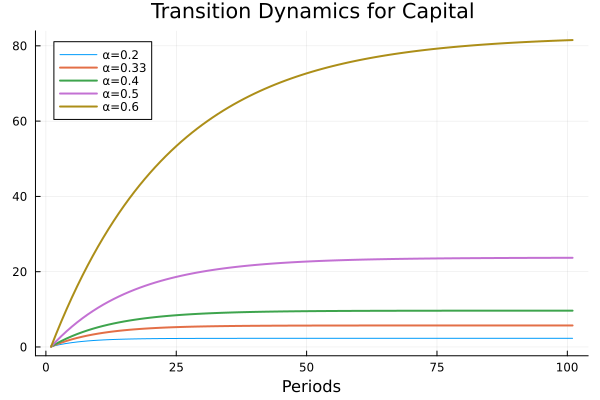

In [255]:
# Plot
plot(kpol_f[:,1], label="α=0.2", xlabel="Periods", title = "Transition Dynamics for Capital")
plot!(kpol_f[:,2], label="α=0.33", lw=2)
plot!(kpol_f[:,3], label="α=0.4", lw=2)
plot!(kpol_f[:,4], label="α=0.5", lw=2)
plot!(kpol_f[:,5], label="α=0.6", lw=2)


Compute the utility function for every possible level of $\alpha$.

In [256]:
rf1 = util(σ,α_grid[1]);
rf2 = util(σ,α_grid[2]);
rf3 = util(σ,α_grid[3]);
rf4 = util(σ,α_grid[4]);
rf5 = util(σ,α_grid[5]);

In [257]:
dff = DataFrame(
    Dict(
        "Parameter" => ["Steady State Capital", "Steady State Investment", "Steady State Consumption", "Steady State Utility Level"],
        "α=0.2" => [kf[1], xf[1], cf[1], rf1([zf[1], kf[1], xf[1]])],
        "α=0.33" => [kf[2], xf[2], cf[2], rf2([zf[2], kf[2], xf[2]])],
        "α=0.4" => [kf[3], xf[3], cf[3], rf3([zf[3], kf[3], xf[3]])],
        "α=0.5" => [kf[4], xf[4], cf[4], rf4([zf[4], kf[4], xf[4]])],
        "α=0.6" => [kf[5], xf[5], cf[5], rf5([zf[5], kf[5], xf[5]])]
    )
)

dff

Row,Parameter,α=0.2,α=0.33,α=0.4,α=0.5,α=0.6
,String,Float64,Float64,Float64,Float64,Float64
1,Steady State Capital,2.30243,5.71563,9.65232,23.7344,82.6372
2,Steady State Investment,0.115121,0.285781,0.482616,1.18672,4.13186
3,Steady State Consumption,1.06639,1.49181,1.99397,3.68508,10.0035
4,Steady State Utility Level,0.0642774,0.399988,0.690125,1.30429,2.30293


Now, as expected, not only the level of utility at the steady state changes, but also do the equilibrium variables. Mathematically, this is intuitive since $\alpha$ is one of the parameters that the steady state level of capital depends on. Since $\alpha$ is the output elasticity to capital, a higher value for this parameters implies that capital is more important in production, which incentivizes capital accumulation. Another way to see this is by recalling that the marginal product of capital is strictly increasing in $\alpha$, meaning that in high-$\alpha$ environments, the marginal return to each unit invested will be higher. This leads to more capital accumulation in the long-run, as well as consumption.

## Item (g)

In [283]:
# Grid for α
ρ_grid = [0.80, 0.85, 0.90, 0.95, 0.99];

# Initialize vectors/matrices
zg = zeros(length(ρ_grid));
kg = zeros(length(ρ_grid));
cg = zeros(length(ρ_grid));
xg = zeros(length(ρ_grid));
kpol_g = zeros(t+1,length(ρ_grid)); # the name was a bad choice, but this will store transition dynamics, not policy function.
policykg = zeros(nk,length(ρ_grid)); # policy function for capital.

for i = 1:length(ρ_grid)
    ρg = ρ_grid[i];
    zg[i],kg[i],cg[i],xg[i] = ss(σ,β,δ,α,ρg,σ_ε);
    Jg,Hg = getJacobHess(σ,α,zg[i],kg[i],xg[i],r);
    Ag,Bg,Cg,Qg,Rg,Wg = matrices(ρg,δ,Jg,Hg,zg[i],kg[i],xg[i],r);
    Fg,Pg = getPF_va(Ag,Bg,Cg,Qg,Rg,Wg,β);
    shocks = zeros(t);
    X_0g = [1;zg[i];0.1];
    u_aux,X_aux = dynamics(Fg,Ag,Bg,Cg,t,X_0g,shocks);
    kpol_g[:,i] = X_aux[3,:];
    kgridaux = grid_capital(kg[i],nk);
    policykg[:,i] = capital_policy(Fg,kg[i],xg[i],kgridaux,nk,δ);
end

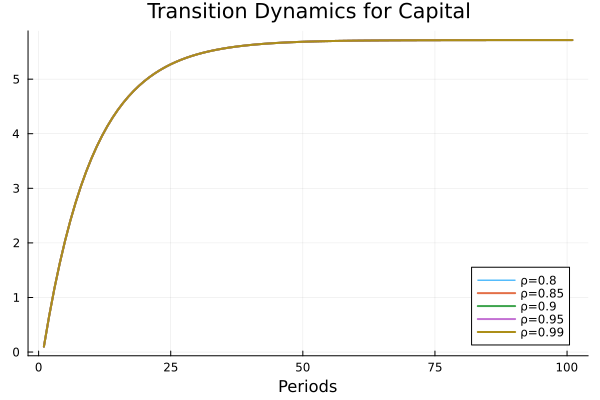

In [284]:
# Plot
plot(kpol_g[:,1], label="ρ=0.8", xlabel="Periods", title = "Transition Dynamics for Capital")
plot!(kpol_g[:,2], label="ρ=0.85", lw=2)
plot!(kpol_g[:,3], label="ρ=0.9", lw=2)
plot!(kpol_g[:,4], label="ρ=0.95", lw=2)
plot!(kpol_g[:,5], label="ρ=0.99", lw=2)


In [285]:
dfg = DataFrame(
    Dict(
        "Parameter" => ["Steady State Capital", "Steady State Investment", "Steady State Consumption", "Steady State Utility Level"],
        "ρ=0.2" => [kg[1], xg[1], cg[1], r([zg[1], kg[1], xg[1]])],
        "ρ=0.33" => [kg[2], xg[2], cg[2], r([zg[2], kg[2], xg[2]])],
        "ρ=0.4" => [kg[3], xg[3], cg[3], r([zg[3], kg[3], xg[3]])],
        "ρ=0.5" => [kg[4], xg[4], cg[4], r([zg[4], kg[4], xg[4]])],
        "ρ=0.6" => [kg[5], xg[5], cg[5], r([zg[5], kg[5], xg[5]])]
    )
)

dfg


Row,Parameter,ρ=0.2,ρ=0.33,ρ=0.4,ρ=0.5,ρ=0.6
,String,Float64,Float64,Float64,Float64,Float64
1,Steady State Capital,5.71563,5.71563,5.71563,5.71563,5.71563
2,Steady State Investment,0.285781,0.285781,0.285781,0.285781,0.285781
3,Steady State Consumption,1.49181,1.49181,1.49181,1.49181,1.49181
4,Steady State Utility Level,0.399988,0.399988,0.399988,0.399988,0.399988


Since I'm analyzing the transition dynamics of the deterministic economy, note that $\rho$ doesn't affect the steady state outcomes. This is to be expected, since $\rho$ is the persistence of the shocks and in the deterministic economy there are no shocks. However, the policy function for capital changes, since it takes into accounts the shocks in this economy. The next graph displays this result:

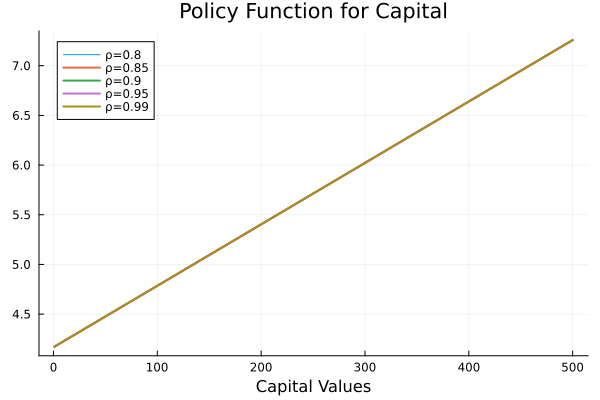

In [286]:
# Plot
plot(policykg[:,1], label="ρ=0.8", xlabel="Capital Values", title = "Policy Function for Capital")
plot!(policykg[:,2], label="ρ=0.85", lw=2)
plot!(policykg[:,3], label="ρ=0.9", lw=2)
plot!(policykg[:,4], label="ρ=0.95", lw=2)
plot!(policykg[:,5], label="ρ=0.99", lw=2)

## Item (h)

In [289]:
# Grid for α
σ_ε_grid= [0.01, 0.02, 0.05, 0.1, 0.2];

# Initialize vectors/matrices
zh = zeros(length(σ_ε_grid));
kh = zeros(length(σ_ε_grid));
ch = zeros(length(σ_ε_grid));
xh = zeros(length(σ_ε_grid));
kpol_h = zeros(t+1, length(σ_ε_grid));
policykh = zeros(nk,length(σ_ε_grid)); # policy function for capital.

for i = 1:length(σ_ε_grid)
    σ_εh = σ_ε_grid[i];
    zh[i], kh[i], ch[i], xh[i] = ss(σ, β, δ, α, ρ, σ_εh);
    Jh, Hh = getJacobHess(σ, α, zh[i], kh[i], xh[i], r);
    Ah, Bh, Ch, Qh, Rh, Wh = matrices(σ, δ, Jh, Hh, zh[i], kh[i], xh[i], r);
    Fh, Ph = getPF_va(Ah, Bh, Ch, Qh, Rh, Wh, β);
    shocks = zeros(t);
    X_0h = [1; zh[i]; 0.1];
    u_aux, X_aux = dynamics(Fh, Ah, Bh, Ch, t, X_0h, shocks);
    kpol_h[:, i] = X_aux[3, :];
    kgridaux = grid_capital(kh[i],nk);
    policykh[:,i] = capital_policy(Fh,kh[i],xh[i],kgridaux,nk,δ);
end

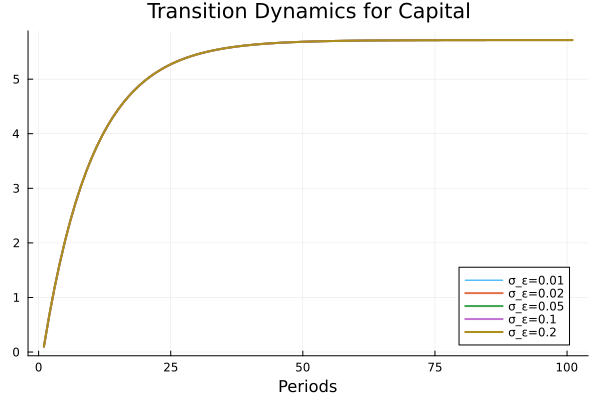

In [290]:
# Plot
plot(kpol_h[:,1], label="σ_ε=0.01", xlabel="Periods", title = "Transition Dynamics for Capital")
plot!(kpol_h[:,2], label="σ_ε=0.02", lw=2)
plot!(kpol_h[:,3], label="σ_ε=0.05", lw=2)
plot!(kpol_h[:,4], label="σ_ε=0.1", lw=2)
plot!(kpol_h[:,5], label="σ_ε=0.2", lw=2)


In [291]:
dfh = DataFrame(
    Dict(
        "Parameter" => ["Steady State Capital", "Steady State Investment", "Steady State Consumption", "Steady State Utility Level"],
        "σ_ε=0.01" => [kh[1], xh[1], ch[1], r([zh[1], kh[1], xh[1]])],
        "σ_ε=0.02" => [kh[2], xh[2], ch[2], r([zh[2], kh[2], xh[2]])],
        "σ_ε=0.05" => [kh[3], xh[3], ch[3], r([zh[3], kh[3], xh[3]])],
        "σ_ε=0.1" => [kh[4], xh[4], ch[4], r([zh[4], kh[4], xh[4]])],
        "σ_ε=0.2" => [kh[5], xh[5], ch[5], r([zh[5], kh[5], xh[5]])]
    )
)

dfh


Row,Parameter,σ_ε=0.01,σ_ε=0.02,σ_ε=0.05,σ_ε=0.1,σ_ε=0.2
,String,Float64,Float64,Float64,Float64,Float64
1,Steady State Capital,5.71563,5.71563,5.71563,5.71563,5.71563
2,Steady State Investment,0.285781,0.285781,0.285781,0.285781,0.285781
3,Steady State Consumption,1.49181,1.49181,1.49181,1.49181,1.49181
4,Steady State Utility Level,0.399988,0.399988,0.399988,0.399988,0.399988


As in item (d), since the table and graph above are anaylizing the deterministic economy, changes in the variance of the shocks won't make a difference.

---
# Question 2

Get data from NIPA 1.1.5:

In [265]:
using BeaData

nipa115 = bea_table("NIPA","T10105","A",1970,2020;user_id = "E784CF94-0F41-4D4D-9036-F4FA99B477E7")

BEA Table
Dataset:     NIPA
Table No.:   1.1.5
Description: Gross Domestic Product
Metric:      Current Dollars
Units:       Billions of dollars
Frequency:   Annual
Dates:       1970 - 2020
Revised:     October 30, 2024


Filter data for NIPA Table 1.1.5 and compute some shares:

In [266]:
q2nipa115 = @chain nipa115.data_values begin
            @select(:Date                 = :TimePeriod,
                    :GDP                  = :Line01,
                    :p_consumption        = :Line02,
                    :p_consumption_goods  = :Line03,
                    :p_consumption_dgoods = :Line04,
                    :p_consumption_ndgoods= :Line05,
                    :p_consumption_serv   = :Line06,
                    :p_investment         = :Line07,
                    :p_investment_fixedi  = :Line08,
                    :p_inv_fixedi_nonres  = :Line09,
                    :pinvfixedinonres_st  = :Line10,
                    :pinvfixedinonres_eq  = :Line11,
                    :pinvfixedinonres_ip  = :Line12,
                    :p_inv_fixedif_res    = :Line13,
                    :p_inv_deltainv       = :Line14,
                    :net_exports          = :Line15,
                    :net_exports_exp      = :Line16,
                    :net_exports_exp_good = :Line17,
                    :net_exports_exp_serv = :Line18,
                    :net_exports_imp      = :Line19,
                    :net_exports_imp_good = :Line20,
                    :net_exports_imp_serv = :Line21,                    
                    :g_consumption        = :Line22,
                    :g_consumption_fed    = :Line23,
                    :g_confed_defense     = :Line24,
                    :g_confed_nondefense   = :Line25,
                    :g_consumption_state  = :Line26)
            @transform(:private_consumption_share    = :p_consumption ./ :GDP,
                    :private_investment_share                = :p_investment  ./ :GDP,
                    :net_exports_share               = :net_exports   ./ :GDP,
                    :gov_consumption_share           = :g_consumption ./ :GDP,
                    :year              = year.(:Date))
            @select(:year, :GDP, :private_consumption_share, :private_investment_share, :net_exports_share, :gov_consumption_share)
            @subset(in([1970, 1980, 1990, 2000, 2010, 2020]).(:year))
end

Row,year,GDP,private_consumption_share,private_investment_share,net_exports_share,gov_consumption_share
,Int64,Float64?,Float64,Float64,Float64,Float64
1,1970,1073.3,0.602555,0.158435,0.00367836,0.235331
2,1980,2857.31,0.612698,0.185524,-0.00456934,0.206347
3,1990,5963.14,0.638756,0.166598,-0.013056,0.207702
4,2000,10251.0,0.660151,0.198851,-0.0371744,0.178173
5,2010,15049.0,0.681791,0.143895,-0.0353718,0.209685
6,2020,21354.1,0.666179,0.175845,-0.0293247,0.187301


Note that all shares computed above changed over time. Between 1970, private consumption share increased by roughly 6.5 percentage points, while the government consumption share - which here includes nondefense expenditures - decreased by ~ 5 percentage points. The private investment share haven't increased much on the other hand. It is also worth noticing that the net exports share was positive in 1970, but negative for the other years, indicating that, for all the years analyzed except 1970, imports were greater than exports.

As discussed in the lecture, let's compute the same shares as above, but in the government consumption we will consider only spending with defense. All non-defense expenses will be included in private consumption. I'll then define the following share:

$$
\text{Consumption Share} = \frac{\text{Private Consumption}+\text{Nondefense Government Consumption}}{GDP}
$$

In [267]:
# Compute additional statistics based on the first result
new_statistics = @chain nipa115.data_values begin
    @select(:Date                 = :TimePeriod,
            :GDP                  = :Line01,
            :p_consumption        = :Line02,
            :p_investment         = :Line07,
            :net_exports          = :Line15,
            :g_consumption_fed    = :Line23,
            :g_confed_defense     = :Line24,
            :g_confed_nondefense  = :Line25,
            :g_consumption_state  = :Line26)
    @transform(:consumption_share = ((:p_consumption + :g_confed_nondefense + :g_consumption_state) ./ :GDP),
               :investment_share  = :p_investment  ./ :GDP,
               :net_exports_share = :net_exports ./ :GDP,
               :gov_consumption_share  = :g_confed_defense ./ :GDP,
               :year              = year.(:Date))
    @select(:year, :GDP, :consumption_share, :investment_share, :net_exports_share, :gov_consumption_share)
    @subset(in([1970, 1980, 1990, 2000, 2010, 2020]).(:year))
end

Row,year,GDP,consumption_share,investment_share,net_exports_share,gov_consumption_share
,Int64,Float64?,Float64,Float64,Float64,Float64
1,1970,1073.3,0.744054,0.158435,0.00367836,0.0938318
2,1980,2857.31,0.754858,0.185524,-0.00456934,0.0641881
3,1990,5963.14,0.778539,0.166598,-0.013056,0.0679184
4,2000,10251.0,0.800028,0.198851,-0.0371744,0.038296
5,2010,15049.0,0.836458,0.143895,-0.0353718,0.0550184
6,2020,21354.1,0.812038,0.175845,-0.0293247,0.0414419


With this change in the interpretation of the accounts, notice that the increase in consumption share over time is even more noticeable. On the other hand, government expenditures with defense decreased as a share of GDP by about 5 percentage points.

Get data from NIPA 1.1.0:

In [268]:
nipa110 = bea_table("NIPA","T11000","A",1970,2020;user_id = "E784CF94-0F41-4D4D-9036-F4FA99B477E7")

BEA Table
Dataset:     NIPA
Table No.:   1.10
Description: Gross Domestic Income by Type of Income
Metric:      Current Dollars
Units:       Billions of dollars
Frequency:   Annual
Dates:       1970 - 2020
Revised:     October 30, 2024


Filter data for NIPA 1.1.0 and compute some shares:

In [269]:
q2nipa110 = @chain nipa110.data_values begin
            @select(:Date                 = :TimePeriod,
                    :GDI                  = :Line01,
                    :comp_employee        = :Line02,
                    :wages_salaries       = :Line03,
                    :wagessalaries_person = :Line04,
                    :wagessalaries_world  = :Line05,
                    :supp_wag_salaries    = :Line06,
                    :taxes_prod_imports   = :Line07,
                    :subsidies            = :Line08,
                    :net_op_surplus       = :Line09,
                    :priv_enterprises     = :Line10,
                    :netint_mispayments   = :Line11,
                    :businesstransfer     = :Line12,
                    :proprietors_income   = :Line13,
                    :rental_income        = :Line14,
                    :corp_profits         = :Line15,
                    :taxes_corp_income    = :Line16,
                    :profit_after_tax     = :Line17,
                    :net_dividends        = :Line18,
                    :undist_corp_profit   = :Line19,
                    :current_surplus_gov  = :Line20,
                    :cons_fixed_capital   = :Line21,                    
                    :consfixedcap_priv    = :Line22,
                    :consfixedcap_gov     = :Line23,
                    :stat_discrepancy     = :Line24)
            @transform(:compensation_employees_share    = :comp_employee ./ :GDI,
                    :taxes_production_imports_share     = :taxes_prod_imports  ./ :GDI,
                    :subsidies_share                    = :subsidies   ./ :GDI,
                    :net_operating_surplus_share        = :net_op_surplus ./ :GDI,
                    :consumption_fixed_capital_share    = :cons_fixed_capital ./ :GDI,
                    :year              = year.(:Date))
            @select(:year, :GDI, :stat_discrepancy, :compensation_employees_share, :taxes_production_imports_share, :subsidies_share, :net_operating_surplus_share, :consumption_fixed_capital_share)
            @subset(in([1970, 1980, 1990, 2000, 2010, 2020]).(:year))
end

Row,year,GDI,stat_discrepancy,compensation_employees_share,taxes_production_imports_share,subsidies_share,net_operating_surplus_share,consumption_fixed_capital_share
,Int64,Float64?,Float64?,Float64,Float64,Float64,Float64,Float64
1,1970,1067.96,5.338,0.583656,0.0855955,0.00447299,0.207093,0.128131
2,1980,2813.04,44.27,0.576724,0.0712148,0.00348378,0.203243,0.152302
3,1990,5867.79,95.355,0.569666,0.0724276,0.00460037,0.211081,0.151425
4,2000,10346.7,-95.765,0.565844,0.0684812,0.00443039,0.224046,0.146058
5,2010,14979.5,69.445,0.529587,0.0709684,0.00372562,0.243593,0.159577
6,2020,21246.5,107.632,0.546163,0.0716008,0.0328765,0.244567,0.170546


As the table displays, compensation to employees as a share of output decreased by about 5 percentage points. Taxes on production and imports also decreased, but by a small amount. What is more surprising is the increase in the subsidies share, although it continues to be  relatively small. In 1970, subsidies corresponded to ~0.44% of GDI, while in 2020 this number was above 3%. Net operating surplus and consumption of fixed capital as a share of GDI also observed a significant increase over the period analyzed.

PS: Statistical discrepancy is the difference between GDP and GDI.

Quote from BEA: "In theory, GDI should equal gross domestic product, but the different source data yield different results. BEA considers GDP more reliable because it's based on timelier, more expansive data."

In the next exercise, I will choose GDP over GDI.

---
# Question 3

From item (a), it follows that in the SS deterministic economy:

In [270]:
σ = 1; # coefficient of relative risk aversion
β = 0.95; # discount factor
δ = 0.05; # depreciation rate
α = 0.33; # output elasticity of capital
ρ = 0.95; # persistence of shocks
σ_ε = 0.01; # variance of shocks
r = util(σ,α); # return function
k_ss = k; # steady state level of capital
x_ss = x; # ss investment
c_ss = c; # ss consumption
z_ss = z; # doesnt make sense to call it ss, but its just to make things easier and consistent
y_ss = exp(z_ss)*k_ss^α; # ss output

Compute statistics in the model:

In [271]:
comp_employee_model = 1-α; # compensation to employees in the model
interest_rate = α*exp(z)*k_ss^(α-1); 
corp_profit_model = (interest_rate*k_ss-δ*k_ss)/y_ss; # corporate profits as share of output
c_y_model = c_ss/y_ss; # capital output ratio model
x_y_model = x_ss/y_ss; # investment output ratio model
div_model = interest_rate*k_ss - δ*k_ss;
div_y_model = div_model/y_ss;

In order to compute statistics in the data, I have to organize the NIPA's table better with all that I need.

Get more data from NIPA 115:

In [272]:
q3nipa115 = @chain nipa115.data_values begin
@select(:Date                 = :TimePeriod,
        :GDP                  = :Line01,
        :p_consumption        = :Line02,
        :p_consumption_goods  = :Line03,
        :p_consumption_dgoods = :Line04,
        :p_consumption_ndgoods= :Line05,
        :p_consumption_serv   = :Line06,
        :p_investment         = :Line07,
        :p_investment_fixedi  = :Line08,
        :p_inv_fixedi_nonres  = :Line09,
        :pinvfixedinonres_st  = :Line10,
        :pinvfixedinonres_eq  = :Line11,
        :pinvfixedinonres_ip  = :Line12,
        :p_inv_fixedif_res    = :Line13,
        :p_inv_deltainv       = :Line14,
        :net_exports          = :Line15,
        :net_exports_exp      = :Line16,
        :net_exports_exp_good = :Line17,
        :net_exports_exp_serv = :Line18,
        :net_exports_imp      = :Line19,
        :net_exports_imp_good = :Line20,
        :net_exports_imp_serv = :Line21,                    
        :g_consumption        = :Line22,
        :g_consumption_fed    = :Line23,
        :g_confed_defense     = :Line24,
        :g_confed_nondefense   = :Line25,
        :g_consumption_state  = :Line26)
@transform(:year              = year.(:Date))
@select(:year, :GDP, :p_consumption, :p_investment, :net_exports, :g_consumption, :g_confed_defense)
@subset(in([1970, 1980, 1990, 2000, 2010, 2020]).(:year))
end

Row,year,GDP,p_consumption,p_investment,net_exports,g_consumption,g_confed_defense
,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,1970,1073.3,646.724,170.049,3.948,252.581,100.71
2,1980,2857.31,1750.67,530.098,-13.056,589.598,183.405
3,1990,5963.14,3808.99,993.448,-77.855,1238.56,405.007
4,2000,10251.0,6767.18,2038.41,-381.073,1826.44,392.57
5,2010,15049.0,10260.3,2165.47,-532.309,3155.55,827.971
6,2020,21354.1,14225.7,3755.01,-626.203,3999.64,884.955


I will re-compute GDP by excluding the government expenditures with defense, since we don't have this in the model. The remaining government's expenditures could be seen as "transfers" to households, so I will compute the share of consumption to GDP as follows:

$$
\text{Consumption share of GDP} = \frac{\text{Private Consumption} + \text{Government Expenditures ex-defense}}{\text{GDP adjusted}}
$$

where $\text{GDP adjusted} = \text{Private Consumption} + \text{Private Investment} + \text{Government Expenditures ex-defense}$. Note that I'm not considering net exports also, since our model has a closed economy.

Moreover, I will use data for 2000. This was an ad hoc choice. 

Get data for 2000:

In [273]:
priv_c = q3nipa115[!,:p_consumption][6]; # private consumption
priv_x = q3nipa115[!,:p_investment][6]; # private investment
gov_c_total = q3nipa115[!,:g_consumption][6]; # total gov consumption
defense_c = q3nipa115[!,:g_confed_defense][6]; # gov expenditures with defense

gov_adjusted = gov_c_total - defense_c; # government expenditures without defense

gdp_adjusted = priv_c + priv_x + gov_adjusted;

Compute some statistics:

In [274]:
c_y_data = (priv_c+gov_adjusted)/gdp_adjusted; # capital output ratio data
x_y_data = priv_x/gdp_adjusted; # investment output ratio data

Get more data from NIPA 110:

In [275]:
q3nipa110 = @chain nipa110.data_values begin
            @select(:Date                 = :TimePeriod,
                    :GDI                  = :Line01,
                    :comp_employee        = :Line02,
                    :wages_salaries       = :Line03,
                    :wagessalaries_person = :Line04,
                    :wagessalaries_world  = :Line05,
                    :supp_wag_salaries    = :Line06,
                    :taxes_prod_imports   = :Line07,
                    :subsidies            = :Line08,
                    :net_op_surplus       = :Line09,
                    :priv_enterprises     = :Line10,
                    :netint_mispayments   = :Line11,
                    :businesstransfer     = :Line12,
                    :proprietors_income   = :Line13,
                    :rental_income        = :Line14,
                    :corp_profits         = :Line15,
                    :taxes_corp_income    = :Line16,
                    :profit_after_tax     = :Line17,
                    :net_dividends        = :Line18,
                    :undist_corp_profit   = :Line19,
                    :current_surplus_gov  = :Line20,
                    :cons_fixed_capital   = :Line21,                    
                    :consfixedcap_priv    = :Line22,
                    :consfixedcap_gov     = :Line23,
                    :stat_discrepancy     = :Line24)
            @transform(:year              = year.(:Date))
            @select(:year, :GDI, :stat_discrepancy, :comp_employee, :corp_profits, :net_dividends)
            @subset(in([1970, 1980, 1990, 2000, 2010, 2020]).(:year))
end

Row,year,GDI,stat_discrepancy,comp_employee,corp_profits,net_dividends
,Int64,Float64?,Float64?,Float64?,Float64?,Float64?
1,1970,1067.96,5.338,623.324,79.144,23.865
2,1980,2813.04,44.27,1622.35,187.655,59.251
3,1990,5867.79,95.355,3342.68,343.243,168.59
4,2000,10346.7,-95.765,5854.63,680.747,383.651
5,2010,14979.5,69.445,7932.97,1388.68,514.546
6,2020,21246.5,107.632,11604.0,1966.02,1171.82


Compute data from NIPA 110:

In [276]:
comp_employee = q3nipa110[!,:comp_employee][6];
corp_profit = q3nipa110[!,:corp_profits][6];
dividends = q3nipa110[!,:net_dividends][6];

Compute some statistics:

In [292]:
comp_employee_data = comp_employee/gdp_adjusted;
corp_profit_data = corp_profit/gdp_adjusted;
div_y_data = dividends/gdp_adjusted;

Create table with comparison model and data:

In [293]:
dfq3 = DataFrame(
    Parameter = ["Consumption-to-output ratio", "Investment-to-output ratio", "Compensation to employees-to-output ratio", "Corporate profits-to-output ratio", "Dividends-to-output ratio"],
    Data = [c_y_data, x_y_data, comp_employee_data, corp_profit_data, div_y_data],
    Model = [c_y_model, x_y_model, comp_employee_model, corp_profit_model, div_y_model]
)

dfq3

Row,Parameter,Data,Model
,String,Float64,Float64
1,Consumption-to-output ratio,0.821998,0.839231
2,Investment-to-output ratio,0.178002,0.160769
3,Compensation to employees-to-output ratio,0.550075,0.67
4,Corporate profits-to-output ratio,0.093197,0.169231
5,Dividends-to-output ratio,0.0555485,0.169231


The model fits surprisingly well the data for some moments. For instance, the fits for the consumption-to-output and investment-to-output ratios are very good. For the other moments, the model does not fit the data well enough.

___